In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)
import wave
import pyaudio
from audio2numpy import open_audio
from IPython.display import Audio
from scipy import signal
from scipy.io.wavfile import write
from scipy.signal import  firwin, freqz, firwin2

In [77]:
n = 11 # filter order - # delay line, works when odd
f = 6000 # cutoff freq
Fs = 48000
nyq = Fs/2
Wn = f/nyq

In [94]:
h_lpf = firwin(n, f, fs = Fs)

In [95]:
h_lpf = firwin(n, f, fs = Fs)

In [96]:
h_hpf = firwin(n, Wn, pass_zero=False)

In [97]:
f2 = 18000
Wn2 = f2/nyq

In [98]:
h_bpf = firwin(n,[Wn, Wn2], pass_zero = False)
h_bsf = firwin(n, [Wn, Wn2], pass_zero = 'bandstop')

In [99]:
wl, hl = signal.freqz(h_lpf)
wh, hh = signal.freqz(h_hpf)
wb, hb = signal.freqz(h_bpf)
ws, hs = signal.freqz(h_bsf)

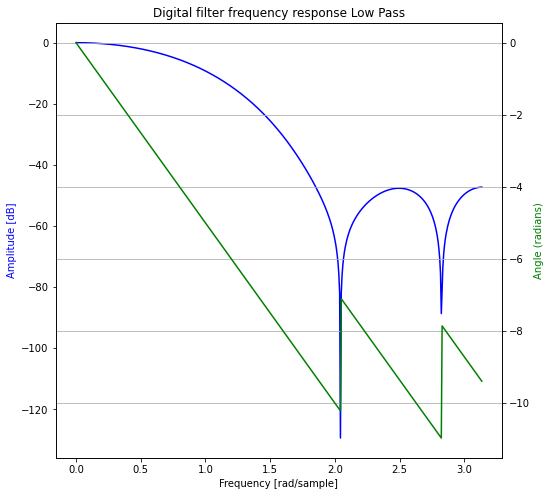

In [100]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response Low Pass')

ax1.plot(wl, 20 * np.log10(abs(hl)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(hl))
ax2.plot(wl, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

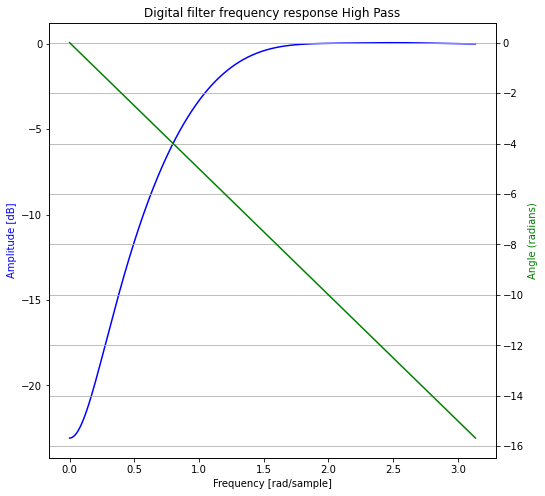

In [101]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response High Pass')

ax1.plot(wh, 20 * np.log10(abs(hh)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(hh))
ax2.plot(wh, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

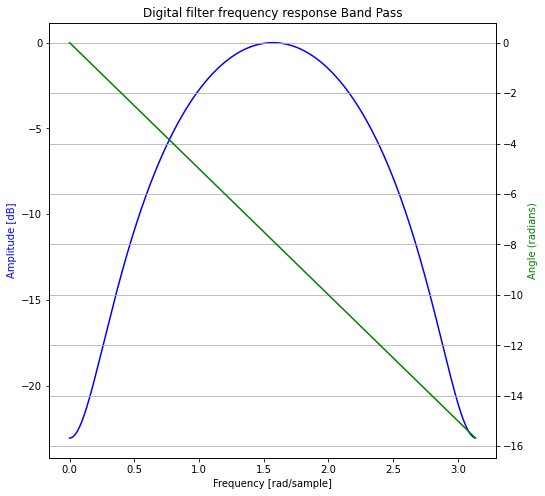

In [102]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response Band Pass')

ax1.plot(wb, 20 * np.log10(abs(hb)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(hb))
ax2.plot(wb, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

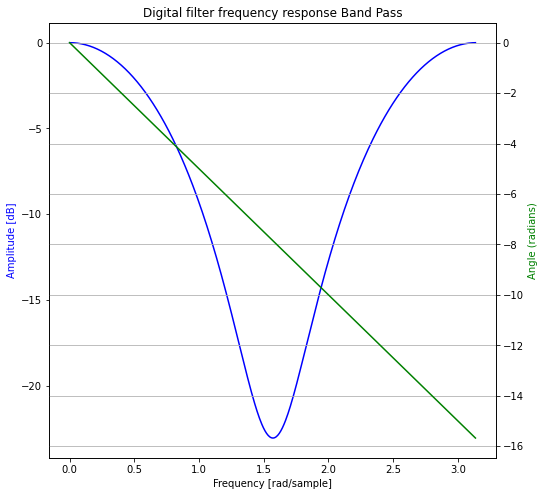

In [103]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response Band Pass')

ax1.plot(ws, 20 * np.log10(abs(hs)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(hs))
ax2.plot(ws, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

### fir2

In [27]:
n = 30 #filter order
frqs = [0, 0.2, 0.5,0.8,1] #normalized frequencies
#amps = [2, 4, 0.25,2,1] #linear amplitudes for each freq
amps = [0, 0.75, 1,0,2]
# Syntax for function
h = firwin2(n+1,frqs,amps)
# Plot frequency response
wx, hy = signal.freqz(h)

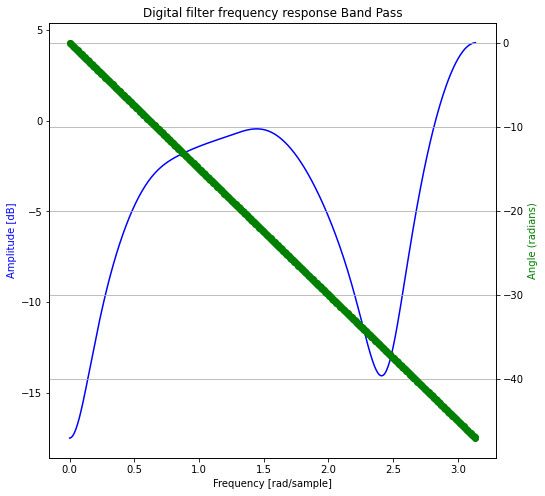

In [28]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response Band Pass')

ax1.plot(wx, 20 * np.log10(abs(hy)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(hy))
ax2.plot(wx, angles, 'go')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

### convolution

In [2]:
filename = "textbookcode-master\Ch_13\AcGtr.wav"
[x,Fs] = open_audio(filename)

In [4]:
Nyq = Fs/2
n = 30 # Order of the filter
freqHz = 500 #frequency in Hz
Wn = freqHz/Nyq # Normalized frequency for fir1
h = firwin(n,Wn) # Filter design function


In [5]:
# "h" is the impulse response of the filter
# Convolution applies the filter to a signal
y = np.convolve(x,h);


In [8]:
Audio(y,rate=Fs) #Listen to the effect

### bandstop filter

In [13]:
order = 24
W_lpf = 0.25 # Normalized freq of LPF
lpf = firwin(order+1,W_lpf)

W_hpf = 0.75 #Normalized freq of HPF
hpf = firwin(order+1,W_hpf,pass_zero=False)

# Impulse input signal
input = [1, 0]
# Separately, find impulse response of LPF and HPF
u = np.convolve(input,lpf)
w = np.convolve(input,hpf)
# Create combined parallel output by adding together IRs
output = u + w

In [14]:
wo, ho = signal.freqz(output)

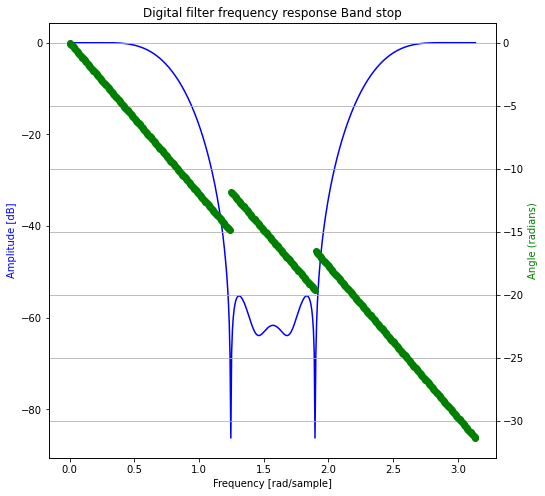

In [17]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response Band stop')

ax1.plot(wo, 20 * np.log10(abs(ho)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(ho))
ax2.plot(wo, angles, 'go')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

### pink noise

In [2]:
Fs = 48000 #Sampling rate
Nyq = Fs/2 # Nyquist frequency for normalization
sec = 5 # 5 seconds of noise
white = np.random.randn(sec*Fs)

In [3]:
f = 20 # Starting frequency in Hz
gain = np.array([1/np.sqrt(f)]) # Amplitude at starting frequency
freq = np.array([0]) # Initialize fir2 freq vector

In [4]:
while f < Nyq:
    # Normalized frequency vector
    freq = np.append(freq,[f/Nyq])
    # Amplitude vector, gain = 1/sqrt(f)
    gain = np.append(gain,[1/np.sqrt(f)]) 
    # Increase "f" by an octave
    f = f*2;

    # Set frequency and amplitude at Nyquist
freq = np.append(freq,[1])
gain = np.append(gain, [1/np.sqrt(Nyq)])

In [5]:
# Filter normalization factor to unity gain
unity = np.sqrt(20)
gain = unity * gain
#Plot frequency response of filter
order = 2000;
h = firwin2(order + 1,freq,gain)

In [18]:
wp, hp = signal.freqz(h,1,worN=4096,fs=Fs)

In [7]:
wp, hp = signal.freqz(h)

In [26]:
hp[0]

(0.9737907880919947+0j)

Text(0.5, 0, 'Frequency [rad/sample]')

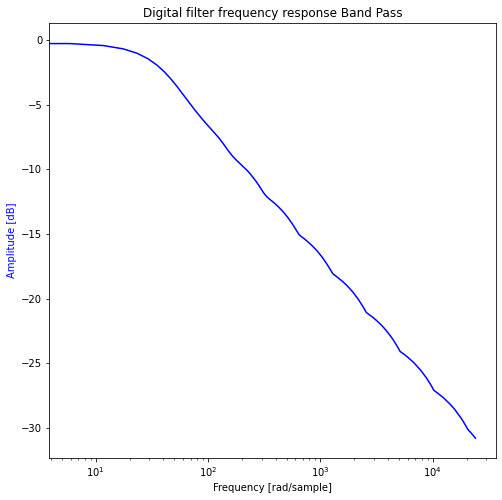

In [19]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response Band Pass')

ax1.semilogx(wp, 20 * np.log10(abs(hp)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')


(20.0, 20000.0, -30.0, 0.0)

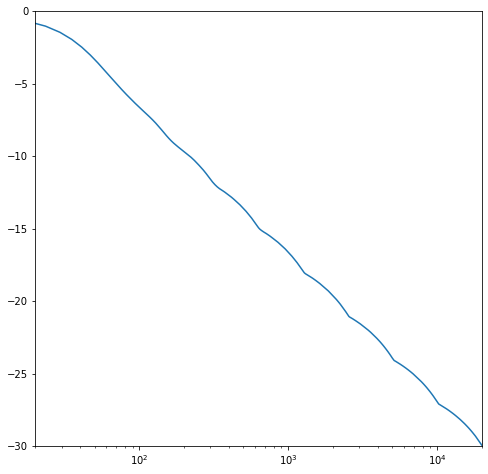

In [21]:
plt.semilogx(wp,20*np.log10(abs(hp)))
plt.axis([20, 20000, -30, 0])

In [23]:
# Create pink noise by filtering white noise
pink = np.convolve(white,h);
Audio(pink,rate=Fs)

In [24]:
Audio(white,rate=Fs)